In [2]:
#추측 통계: 일부 데이터로부터 전체의 통계적 성질을 추측하는 방식
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [4]:
df = pd.read_csv('data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [ ]:
#무작위추출(복원추출)-> np.random.choice(추출대상이 되는 리스틍, 표본의 크기)
np.random.choice([1, 2, 3], 3)

array([1, 2, 3])

In [10]:
#비복원추출-> np.random.choice(추출대상이 되는 리스트, 표본의 크기, replace=False)
np.random.choice([1, 2, 3], 3, replace=False)

array([2, 3, 1])

In [11]:
#난수 시드 설정(매번 동일한 난수를 얻을 수 있음)
np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [13]:
#scores로부터 표본크기가 20인 표본을 무작위추출-> 표본평균 구하기
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.400

In [14]:
#모평균 구하기
scores.mean()

69.530

In [15]:
#무작위추출은 실행할 때마다 결과가 달라지기 때문에 얻어진 표본평균도 매번 달라짐
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻는 표본평균', sample.mean())

1번째 무작위 추출로 얻는 표본평균 72.45
2번째 무작위 추출로 얻는 표본평균 63.7
3번째 무작위 추출로 얻는 표본평균 66.05
4번째 무작위 추출로 얻는 표본평균 71.7
5번째 무작위 추출로 얻는 표본평균 74.15


In [25]:
#불공정한 주사위의 확률분포를 구하는 실험
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [26]:
#인수 p에 prob를 넘겨주는 것으로 각 확률을 지정
np.random.choice(dice, p=prob)

np.int64(4)

In [27]:
#100번 실행
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([2, 3, 4, 6, 1, 4, 5, 4, 5, 6, 4, 6, 3, 4, 6, 2, 2, 6, 6, 5, 1, 4,
       3, 1, 4, 4, 2, 6, 1, 5, 6, 5, 5, 5, 6, 5, 5, 3, 6, 6, 4, 5, 3, 5,
       3, 3, 4, 5, 5, 6, 3, 2, 2, 6, 1, 5, 6, 5, 1, 4, 2, 6, 5, 2, 6, 6,
       6, 6, 4, 4, 6, 4, 3, 4, 4, 5, 3, 6, 3, 6, 6, 1, 3, 2, 5, 2, 3, 6,
       6, 4, 6, 6, 6, 3, 6, 5, 5, 5, 2, 5])

In [28]:
#도수분포표 작성
freq, _=np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency': freq,
              'relative frequency':freq/num_trial},
              index=pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,7,0.07
2,11,0.11
3,14,0.14
4,17,0.17
5,22,0.22
6,29,0.29


C:\Users\kyjhc\AppData\Local\Temp\ipykernel_2688\1032280087.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, 7))


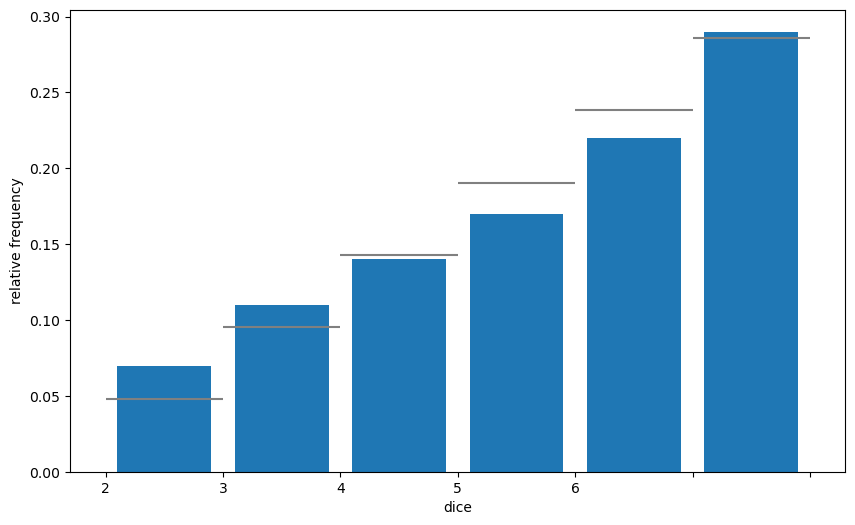

In [29]:
#실제의 확률분포와 함께 히스토그램 그리기
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
#실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
#막대그래프의 [1.5, 2.5, ..., 6.5]에 눈금 표시
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

C:\Users\kyjhc\AppData\Local\Temp\ipykernel_2688\3067841570.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, 7))


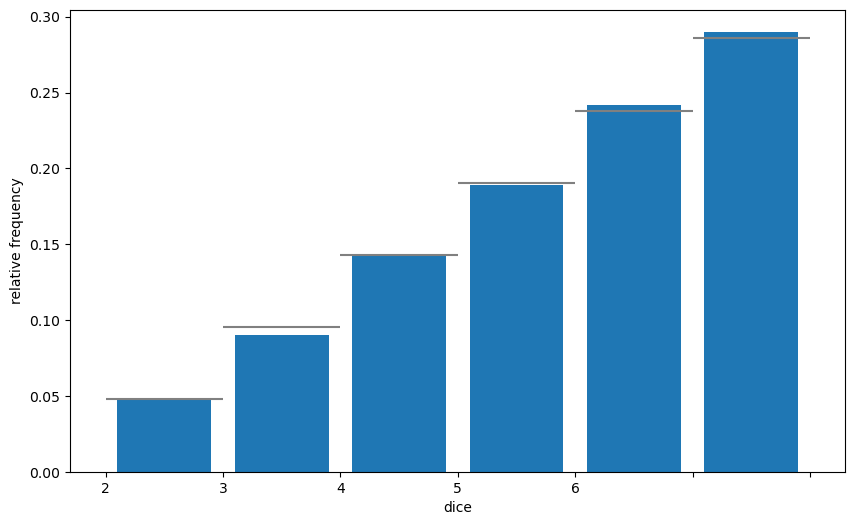

In [30]:
#시행 횟수를 늘려 10000번 시행-> 히스토그램은 실제의 확률분포에 가까워짐
num_trial=10000
sample = np.random.choice(dice,size=num_trial, p=prob)

#실제의 확률분포와 함께 히스토그램 그리기
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
#실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
#막대그래프의 [1.5, 2.5, ..., 6.5]에 눈금 표시
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

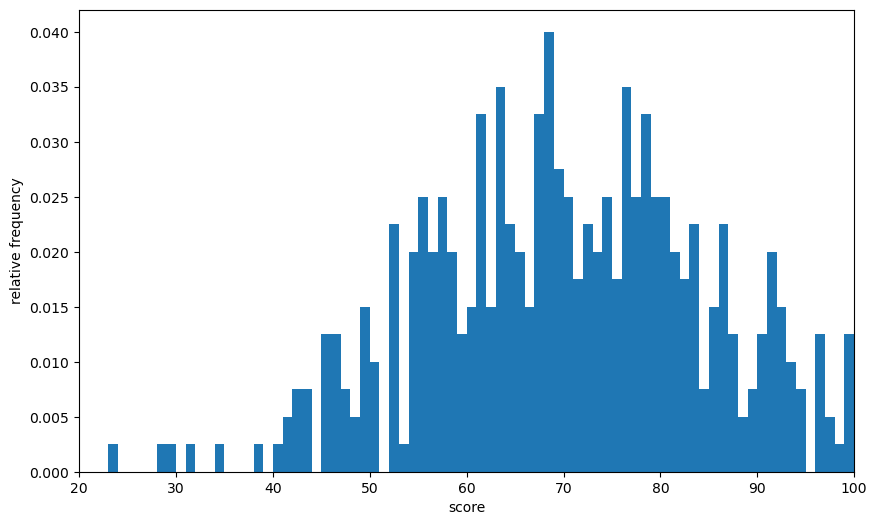

In [33]:
#계급폭을 1로하는 히스토그램
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [35]:
#무작위추출은 확률분포를 따르는 확률변수의 시행
np.random.choice(scores)

np.int64(78)

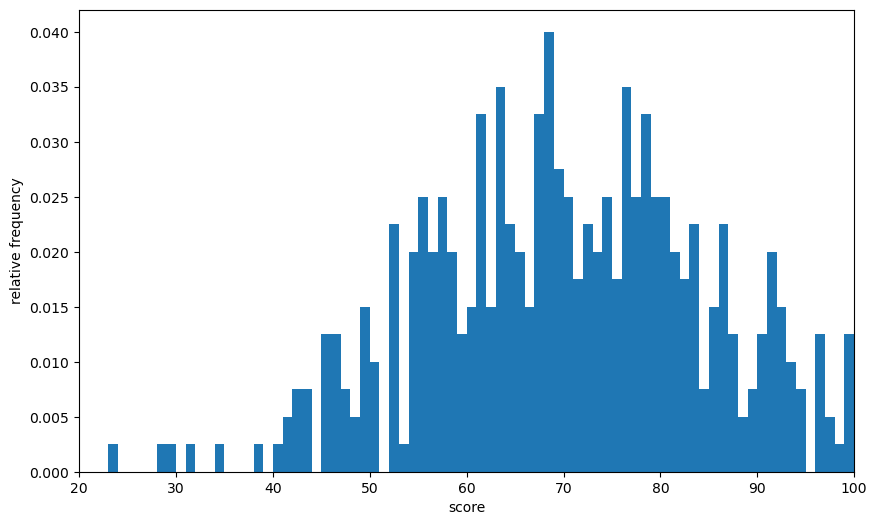

In [36]:
#무작위추출로 샘플 사이즈가 10000인 표본을 추출
sample=np.random.choice(scores,10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

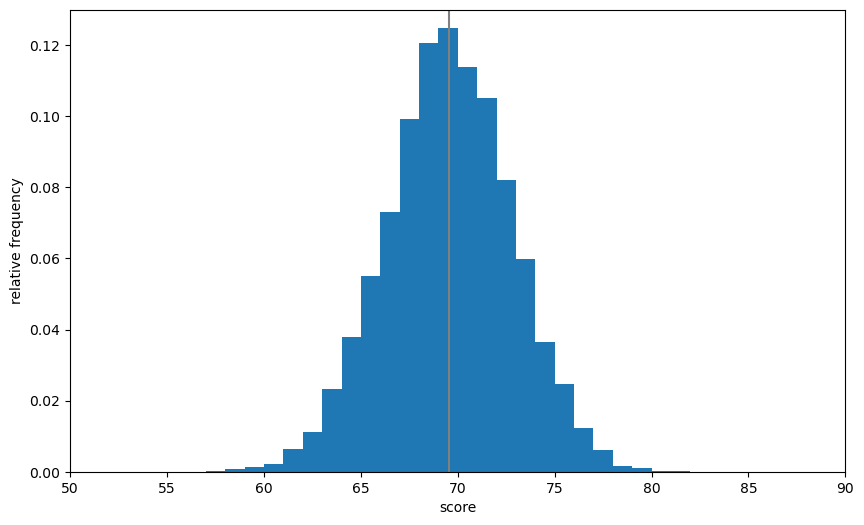

In [41]:
#무작위추출로 표본 크기가 20인 표본을 추출하여 표본 평균을 구하는 작업을 10000번 수행
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0,100), density=True)
#모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()